c:\Users\marty\anaconda3\envs\tf311_env\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Found 7066 images belonging to 7 classes.


c:\Users\marty\anaconda3\envs\tf311_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 750ms/step
Accuracy: 0.3680


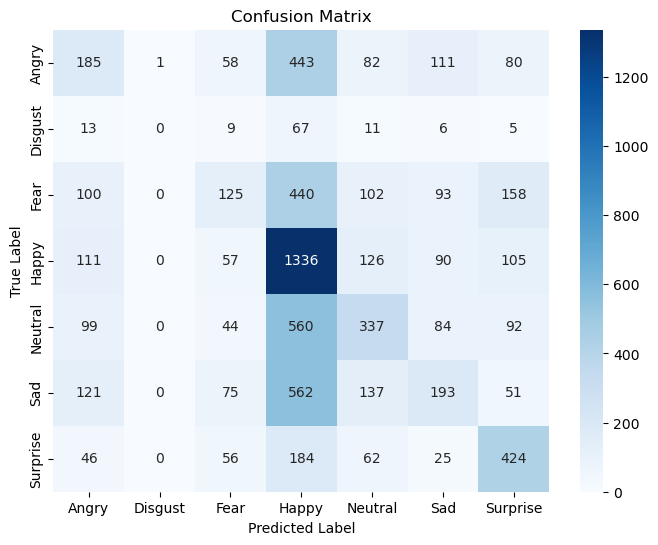


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       Angry       0.27      0.19      0.23       960
     Disgust       0.00      0.00      0.00       111
        Fear       0.29      0.12      0.17      1018
       Happy       0.37      0.73      0.49      1825
     Neutral       0.39      0.28      0.33      1216
         Sad       0.32      0.17      0.22      1139
    Surprise       0.46      0.53      0.50       797

    accuracy                           0.37      7066
   macro avg       0.30      0.29      0.28      7066
weighted avg       0.35      0.37      0.33      7066



In [1]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import random

# Configuration
model_filename = 'models/emotion_model_b-mbv2_aug-light_opt-adam_lr-1e-4_prec-mp_frz-head_only_ftl-40_v4.keras'
folder_path = 'data/images/'
picture_size = 48
batch_size = 128
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load model
model = load_model(model_filename)

# Create validation data generator
def to_rgb(x):
    # x in [0,1], shape (H,W,1) -> (H,W,3)
    return np.repeat(x, 3, axis=-1)

datagen_validation = ImageDataGenerator(rescale=1./255)
validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation/",
    target_size=(picture_size, picture_size),
    color_mode='rgb',        # keep grayscale
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



# Get predictions on entire validation set
validation_set.reset()
predictions = model.predict(validation_set, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)


# Get true labels
true_classes = validation_set.classes

# Accuracy
print(f"Accuracy: {np.mean(predicted_classes == true_classes):.4f}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(7))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(true_classes, predicted_classes,
                           target_names=class_labels,
                           labels=list(range(7)),
                           zero_division=0))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

tf.keras.backend.set_floatx('float32')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    folder_path + 'validation/',   # or 'test/'
    target_size=(48, 48),
    color_mode='rgb',              # 3 channels
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7066 images belonging to 7 classes.


In [3]:
# 3. Identify struggling emotions
print("\n=== PER-CLASS ACCURACY ===")
for i, emotion in enumerate(class_labels):
    class_mask = true_classes == i
    class_acc = np.mean(predicted_classes[class_mask] == true_classes[class_mask])
    print(f"{emotion}: {class_acc:.2%} ({np.sum(class_mask)} samples)")


=== PER-CLASS ACCURACY ===
Angry: 19.27% (960 samples)
Disgust: 0.00% (111 samples)
Fear: 12.28% (1018 samples)
Happy: 73.21% (1825 samples)
Neutral: 27.71% (1216 samples)
Sad: 16.94% (1139 samples)
Surprise: 53.20% (797 samples)


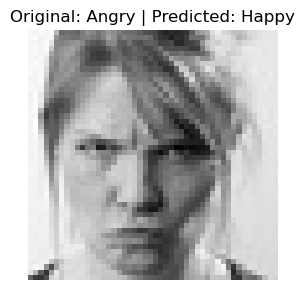

In [20]:
import random

# Randomly select an image index from validation set
n = random.randint(0, len(true_classes) - 1)

# Get the image from validation set
# Find which batch contains image n
batch_idx = n // batch_size
img_idx = n % batch_size

# Get that specific batch
validation_set.reset()
for i in range(batch_idx + 1):
    batch_images, batch_labels = validation_set[i]

# Extract the specific image
image = batch_images[img_idx]
orig_labl = class_labels[true_classes[n]]
pred_labl = class_labels[predicted_classes[n]]

# Display
plt.figure(figsize=(3, 3))
plt.imshow(image[:,:,0], cmap='gray')
plt.title(f"Original: {orig_labl} | Predicted: {pred_labl}")
plt.axis('off')
plt.tight_layout()
plt.show()